<a href="https://colab.research.google.com/github/kishorekumarips/iamKishore/blob/kishorekumarips-patch-1/Copy_of_TF2_0_Build_Your_Own_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build your own model in Tensorflow 2.0

This notebook will teach you how to build your own custom model, where you define your own variables and how to compute predictions.

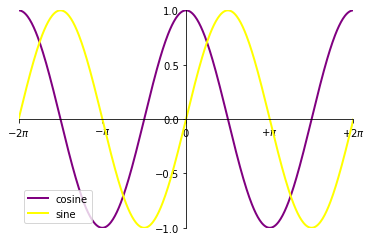

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(-2*np.pi,2*np.pi,512,endpoint=True)#4
cosx,sinx=np.cos(x),np.sin(x)
plt.plot(x,cosx,linewidth='2.0',color='purple',label='cosine')#6
plt.plot(x,sinx,linewidth='2.0',color='yellow',label='sine')#7
plt.xlim(-2*np.pi,2*np.pi)
plt.ylim(-1,1)
plt.xticks([-2*np.pi,-np.pi,0,np.pi,2*np.pi],[r'$-2\pi$', r'$-\pi$', r'$0$', r'$+\pi$', r'$+2\pi$'])#10
plt.yticks([-1,-0.5,0,0.5,1])
ax=plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))#16
ax.yaxis.set_ticks_position('left') 
ax.spines['left'].set_position(('data',0))#18
plt.legend(loc='lower left')
plt.show()

In [ ]:
# Other imports
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define linear regression model

class LinearRegression(tf.keras.Model):
  def __init__(self, num_inputs, num_outputs):
    super(LinearRegression, self).__init__()
    self.W = tf.Variable(
        tf.random_normal_initializer()((num_inputs, num_outputs)))
    self.b = tf.Variable(tf.zeros(num_outputs))
    self.params = [self.W, self.b]

  def call(self, inputs):
    return tf.matmul(inputs, self.W) + self.b

In [ ]:
# Create a dataset
N = 100
D = 1
K = 1
X = np.random.random((N, D)) * 2 - 1
w = np.random.randn(D, K)
b = np.random.randn()
Y = X.dot(w) + b + np.random.randn(N, 1) * 0.1

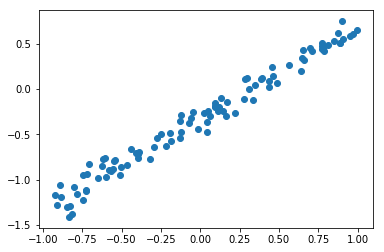

In [ ]:
plt.scatter(X, Y)

In [ ]:
# Cast type, otherwise Tensorflow will complain

X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [ ]:
# Define the loss

def get_loss(model, inputs, targets):
  predictions = model(inputs)
  error = targets - predictions
  return tf.reduce_mean(tf.square(error))

In [ ]:
# Gradient function
def get_grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    # calculate the loss
    loss_value = get_loss(model, inputs, targets)
  
  # return gradient
  return tape.gradient(loss_value, model.params)
  

In [ ]:
# Create and train the model
model = LinearRegression(D, K)

# Print the params before training
print("Initial params:")
print(model.W)
print(model.b)

Initial params:
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[-0.07139343]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [ ]:
# Store the losses here
losses = []

# Create an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.2)

# Run the training loop
for i in range(100):
  # Get gradients
  grads = get_grad(model, X, Y)
  
  # Do one step of gradient descent: param <- param - learning_rate * grad
  optimizer.apply_gradients(zip(grads, model.params))
  
  # Store the loss
  loss = get_loss(model, X, Y)
  losses.append(loss)

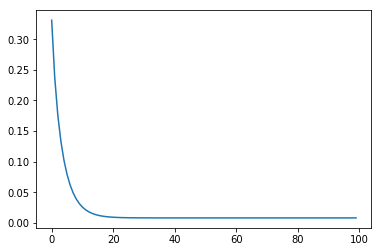

In [ ]:
plt.plot(losses)

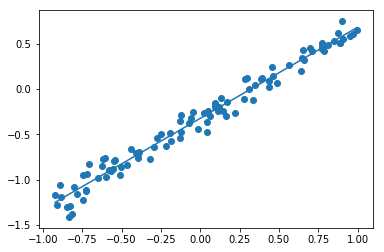

In [ ]:
x_axis = np.linspace(X.min(), X.max(), 100)
y_axis = model.predict(x_axis.reshape(-1, 1)).flatten()

plt.scatter(X, Y)
plt.plot(x_axis, y_axis)



In [ ]:
print("Predicted params:")
print(model.W)
print(model.b)

Predicted params:
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.0059998]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.3224416], dtype=float32)>


In [ ]:
print("True params:")
w, b

True params:


(array([[1.01350001]]), -0.3286531216778375)